# Trabajo integrador - Parte 3
## Aprendizaje No Supervisado
**Nombre**:

## Ejercio 8

Para este ejercicio vamos a utilizar el dataset de _digits_ MNIST:

* [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) (Ejercicio 4)

1. Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?
2. Gráficar la variación acumulada para cada caso.
3. Utilizando [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).
Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de $k=10$ y $k=2$.
4. Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.
5. Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

In [382]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression

# Evaluación de modelos de prueba
from sklearn.metrics import mean_squared_error

from sklearn.model_selection import train_test_split

# Crear datasets
from sklearn.datasets import make_regression, load_digits

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.cluster import KMeans


In [383]:
#cargamos los datos:
dataset = load_digits()

In [384]:
#print(dataset)

In [385]:
#dividimos en datos y target:
X = dataset.data
y = dataset.target

In [386]:
#¿Que tenemos?
print(X.shape)
print(np.unique(y))

(1797, 64)
[0 1 2 3 4 5 6 7 8 9]


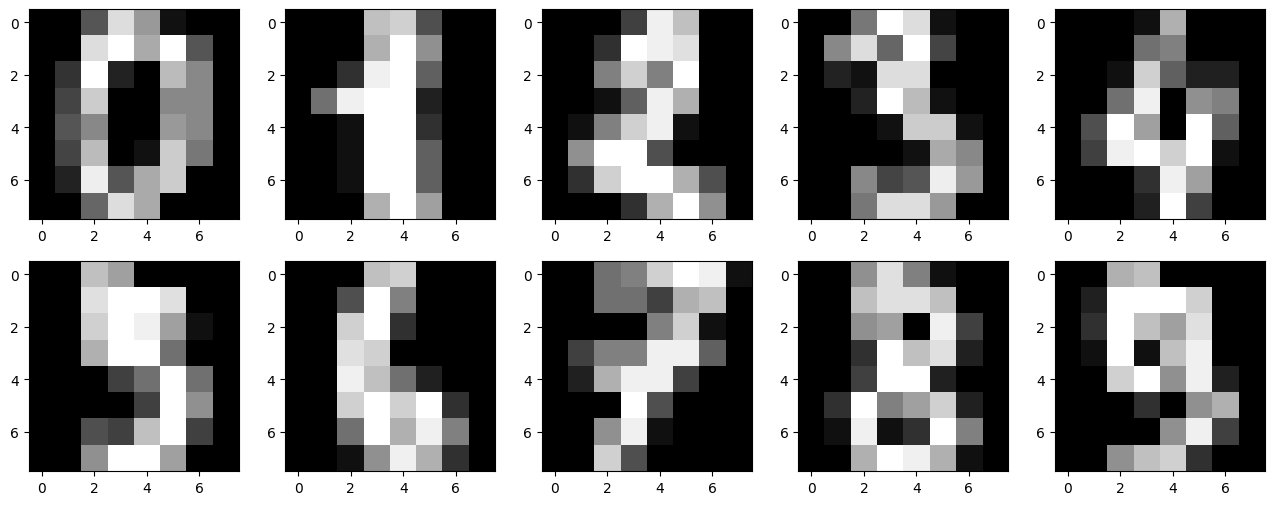

In [387]:
# f, axes = plt.subplots(5, 2, sharey=True, figsize=(16,6))
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X[i,:].reshape([8,8]), cmap='gray')

C:\Users\franco\AppData\Local\Temp\ipykernel_25136\831956936.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))


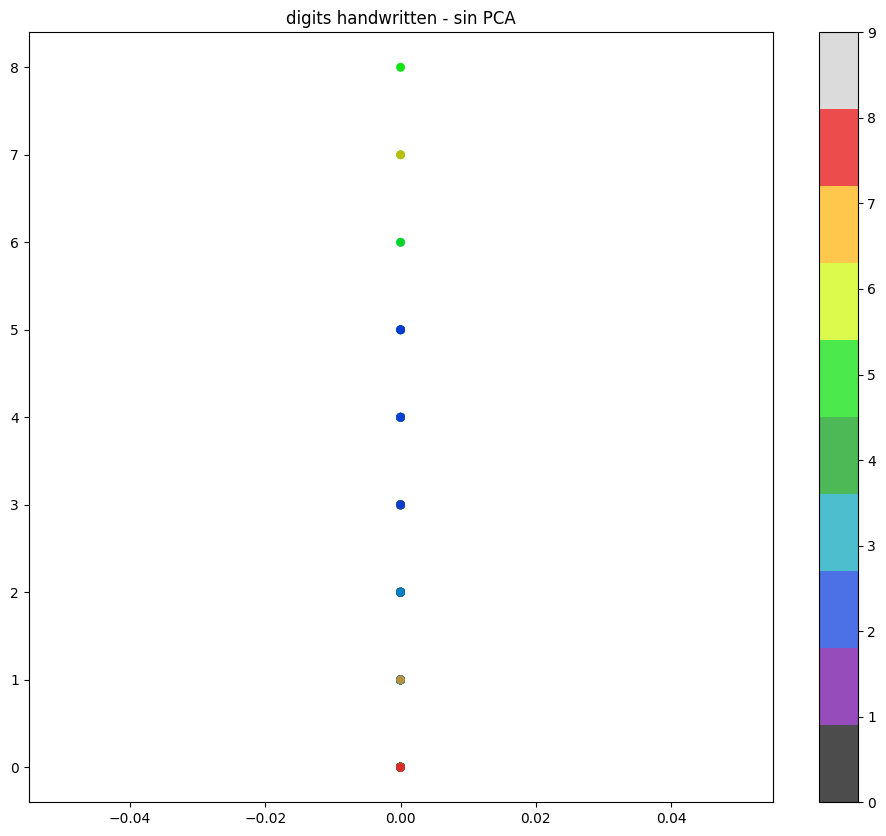

In [388]:
# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
#con "c" y "cmap" ESTAMOS ASIGNANDO COLORES SEGÚN VALORES EN "C" Y EL MAPA DE COLORES PROPORCIONADO EN "cmap":
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('digits handwritten - sin PCA')
plt.show()

In [389]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [390]:
#PCA es sensible a la escala de las variables, por lo tanto, escalamos:
"""Scaler = StandardScaler()
Scaler.fit_transform(X_train)
x_train_standard = Scaler.transform(X_train)
x_test_standard = Scaler.transform(X_test) """

'Scaler = StandardScaler()\nScaler.fit_transform(X_train)\nx_train_standard = Scaler.transform(X_train)\nx_test_standard = Scaler.transform(X_test) '

1. Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?

In [391]:
#APLICAMOS PCA PAR REDUCIR DIMENSIONALIDAD:
pca = PCA(0.80)#aca podemos elegir que cantidad de componentes que queremos o poner la varianza que queremos reterner.n_components=21
#principalComponents_train = pca.fit_transform(x_train_standard)
X_reduced = pca.fit_transform(X)

#varianza explicada por nuestra nueva dimensión de datos:
print("Varianza: ", sum(pca.explained_variance_ratio_))
print("numero de componenetes: ", pca.n_components_)


Varianza:  0.802895776104032
numero de componenetes:  13


Se necesitan 13 componentes. 

2. Gráficar la variación acumulada para cada caso.

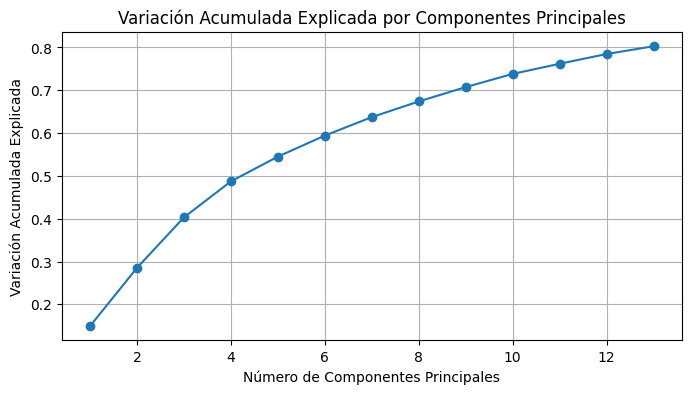

In [392]:
# Calcular la variación acumulada explicada
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)
componentes = range(1,pca.n_components_+1)
# Graficar la variación acumuladas
plt.figure(figsize=(8,4))
plt.plot(componentes, explained_variance_ratio_cumsum, marker='o')
plt.title('Variación Acumulada Explicada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Variación Acumulada Explicada')
plt.grid(True)
#plt.show()

C:\Users\franco\AppData\Local\Temp\ipykernel_25136\2769429839.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))


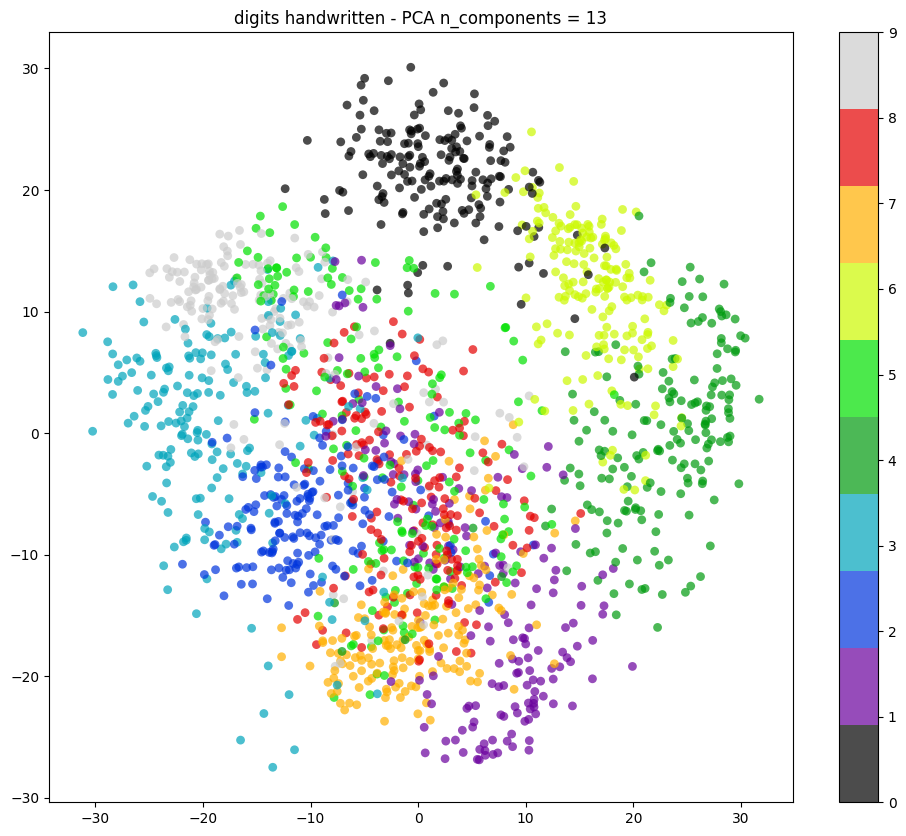

In [393]:
# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
#con "c" y "cmap" ESTAMOS ASIGNANDO COLORES SEGÚN VALORES EN "C" Y EL MAPA DE COLORES PROPORCIONADO EN "cmap":
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('digits handwritten - PCA n_components = {}'.format(pca.n_components_))
plt.show()

3. Utilizando [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).
Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de $k=10$ y $k=2$.

In [394]:
#CREAMOS KMEANS:
kmeans = KMeans(init="random", n_clusters=10, n_init=10, random_state=17)
kmeans.fit(X_reduced)
cluster_labels = kmeans.labels_#contiene las etiquetas asignadas a cada punto de datos en el conjunto de entrenamiento, cada etiqueta indica a que cluster se asignó ese punto.


C:\Users\franco\AppData\Local\Temp\ipykernel_25136\1732766658.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))


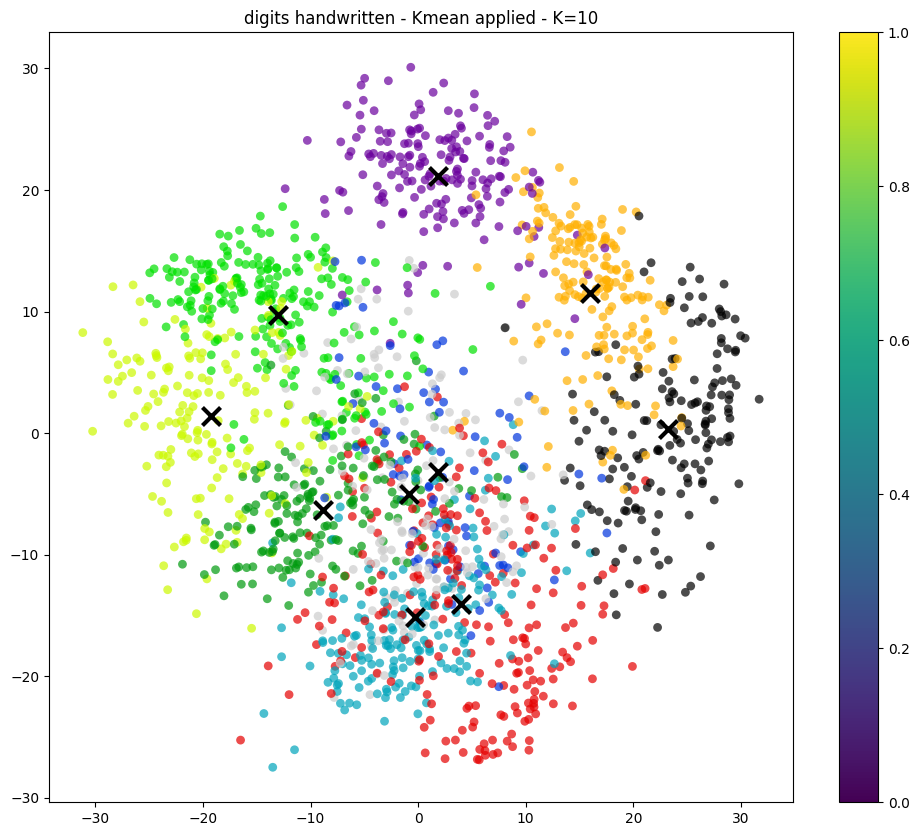

In [395]:
# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
#con "c" y "cmap" ESTAMOS ASIGNANDO COLORES SEGÚN VALORES EN "C" Y EL MAPA DE COLORES PROPORCIONADO EN "cmap":
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker='x', s=169, linewidths=3, 
            color='k', zorder=10) 
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('digits handwritten - Kmean applied - K=10')
plt.show()

In [396]:
#Creamos una tabla de frecuencias cruzadas:
tab = pd.crosstab(y, cluster_labels, margins=True)
tab.index = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'All']
tab.columns = ['cluster ' + str(i + 0) for i in range(10)] + ['All']
print(tab)

     cluster 0  cluster 1  cluster 2  cluster 3  cluster 4  cluster 5  \
0            1        177          0          0          0          0   
1            0          0         56          0         24          0   
2            0          1          1          3        153          0   
3            0          0          0          7          1         10   
4          166          0          4          6          0          0   
5            2          0          0          0          0         41   
6            0          1          0          0          0          0   
7            0          0          1        165          0          0   
8            0          0          7          6          3         45   
9            0          0         20          8          0        139   
All        169        179         89        195        181        235   

     cluster 6  cluster 7  cluster 8  cluster 9   All  
0            0          0          0          0   178  
1          

Probamos lo mismo para K = 2

In [397]:
#CREAMOS KMEANS:
kmeans = KMeans(init="random", n_clusters=2, n_init=2, random_state=17)
kmeans.fit(X_reduced)
cluster_labels = kmeans.labels_#contiene las etiquetas asignadas a cada punto de datos en el conjunto de entrenamiento, cada etiqueta indica a que cluster se asignó ese punto.


C:\Users\franco\AppData\Local\Temp\ipykernel_25136\1769192360.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))


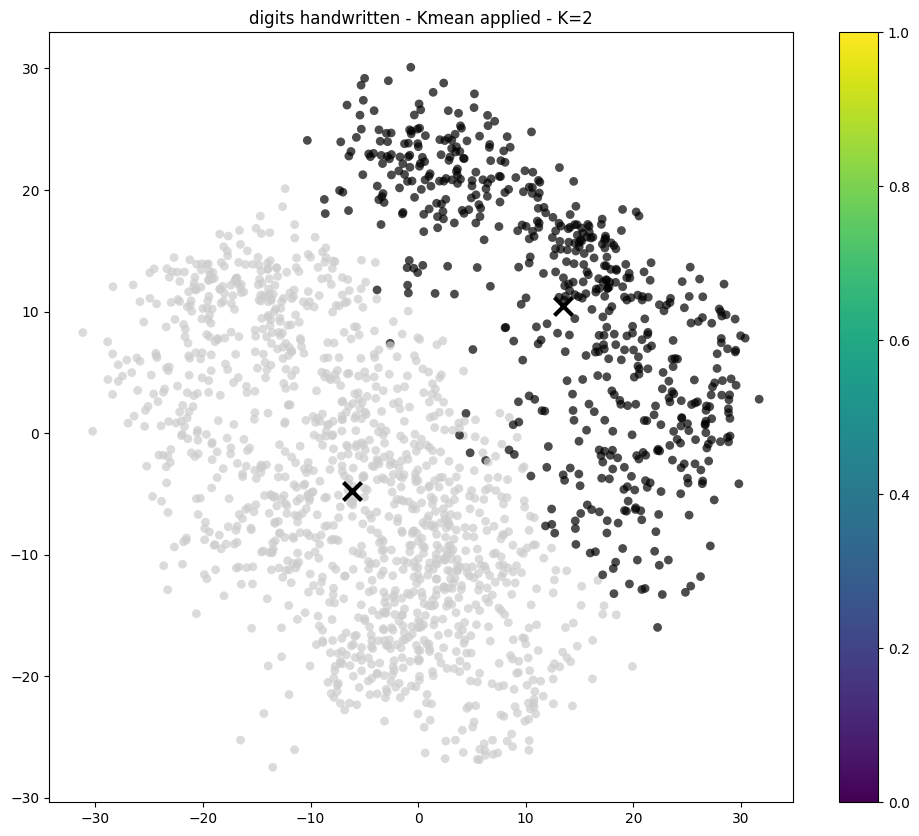

In [398]:
# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
#con "c" y "cmap" ESTAMOS ASIGNANDO COLORES SEGÚN VALORES EN "C" Y EL MAPA DE COLORES PROPORCIONADO EN "cmap":
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker='x', s=169, linewidths=3, 
            color='k', zorder=10) 
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('digits handwritten - Kmean applied - K=2')
plt.show()

In [399]:
#Creamos una tabla de frecuencias cruzadas:
tab2 = pd.crosstab(y, cluster_labels, margins=True)
tab2.index = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'All']
tab2.columns = ['cluster ' + str(i + 0) for i in range(2)] + ['All']
tab2
print(tab2)

     cluster 0  cluster 1   All
0          177          1   178
1            7        175   182
2            0        177   177
3            0        183   183
4          173          8   181
5           20        162   182
6          180          1   181
7            3        176   179
8            2        172   174
9            1        179   180
All        563       1234  1797


OTRO ENFOQUE:
Luego de probar varios valores para PCA a menor varianza explicada K-means "agrupa mejor".

In [400]:
#APLICAMOS PCA PAR REDUCIR DIMENSIONALIDAD:
pca = PCA(n_components=2)#aca podemos elegir que cantidad de componentes que queremos o poner la varianza que queremos reterner.n_components=21
#principalComponents_train = pca.fit_transform(x_train_standard)
X_reduced = pca.fit_transform(X)

#varianza explicada por nuestra nueva dimensión de datos:
print("Varianza: ", sum(pca.explained_variance_ratio_))
print("numero de componenetes: ", pca.n_components_)

Varianza:  0.2850936482369469
numero de componenetes:  2


C:\Users\franco\AppData\Local\Temp\ipykernel_25136\1212520623.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))


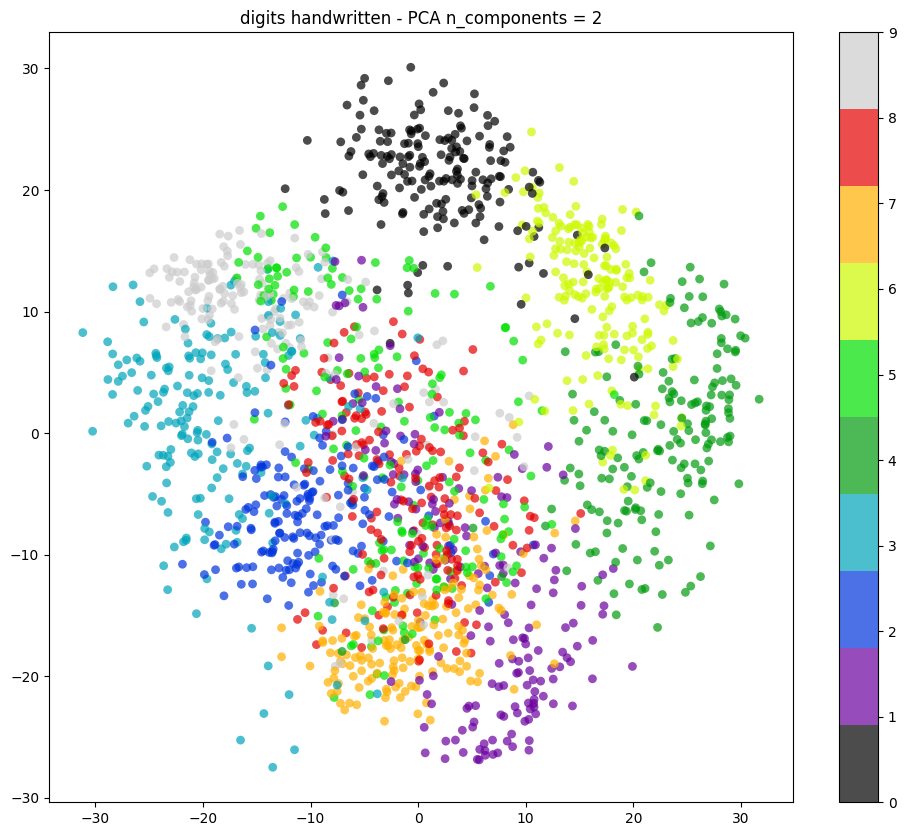

In [401]:
# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
#con "c" y "cmap" ESTAMOS ASIGNANDO COLORES SEGÚN VALORES EN "C" Y EL MAPA DE COLORES PROPORCIONADO EN "cmap":
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('digits handwritten - PCA n_components = 2')
plt.show()

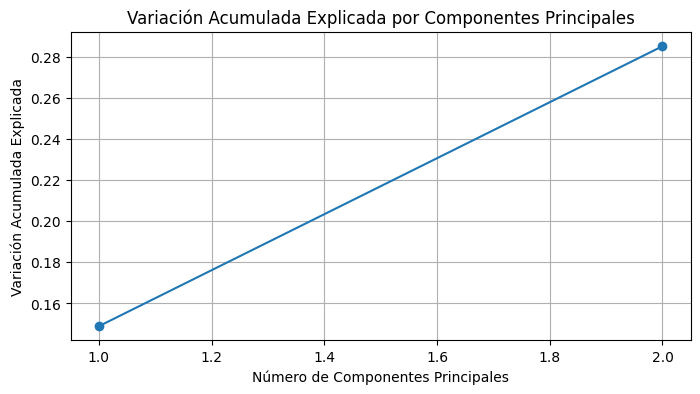

In [402]:

# Calcular la variación acumulada explicada
explained_variance_ratio_cumsum = np.cumsum(pca.explained_variance_ratio_)
componentes = range(1,pca.n_components_+1)
# Graficar la variación acumuladas
plt.figure(figsize=(8,4))
plt.plot(componentes, explained_variance_ratio_cumsum, marker='o')
plt.title('Variación Acumulada Explicada por Componentes Principales')
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Variación Acumulada Explicada')
plt.grid(True)
#plt.show()

In [403]:
#CREAMOS KMEANS:
kmeans = KMeans(init="random", n_clusters=10, n_init=10, random_state=17)
kmeans.fit(X_reduced)
cluster_labels = kmeans.labels_#contiene las etiquetas asignadas a cada punto de datos en el conjunto de entrenamiento, cada etiqueta indica a que cluster se asignó ese punto.


C:\Users\franco\AppData\Local\Temp\ipykernel_25136\1732766658.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))


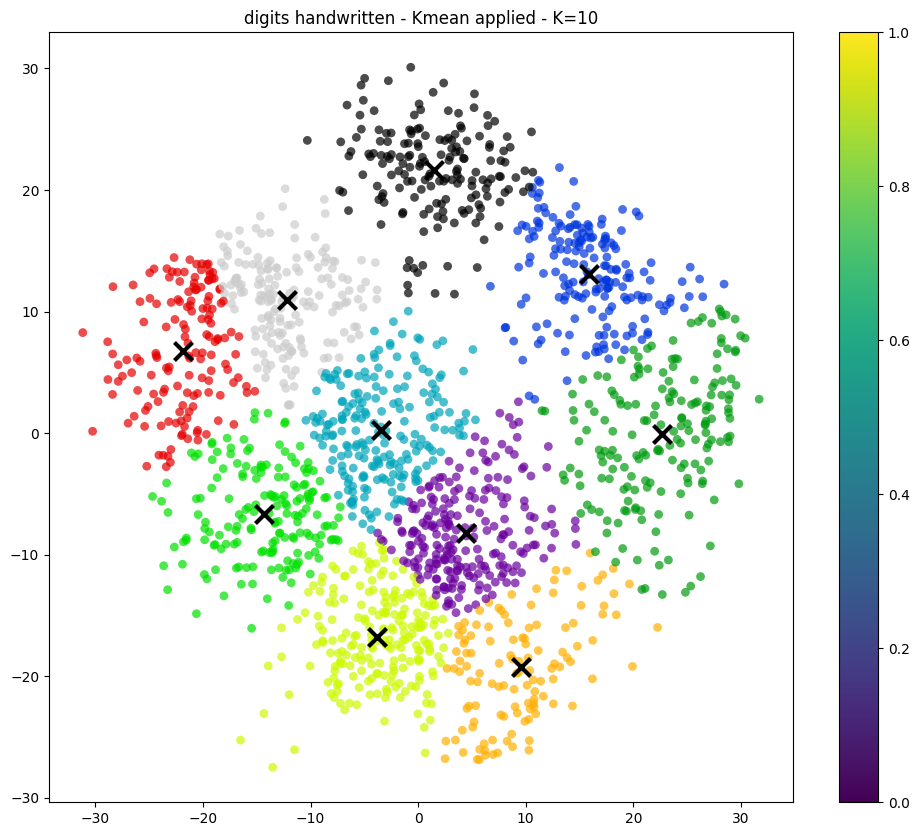

In [404]:
# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
#con "c" y "cmap" ESTAMOS ASIGNANDO COLORES SEGÚN VALORES EN "C" Y EL MAPA DE COLORES PROPORCIONADO EN "cmap":
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker='x', s=169, linewidths=3, 
            color='k', zorder=10) 
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('digits handwritten - Kmean applied - K=10')
plt.show()

In [405]:
#Creamos una tabla de frecuencias cruzadas:
tab = pd.crosstab(y, cluster_labels, margins=True)
tab.index = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'All']
tab.columns = ['cluster ' + str(i + 0) for i in range(10)] + ['All']
print(tab)

     cluster 0  cluster 1  cluster 2  cluster 3  cluster 4  cluster 5  \
0          157          0         15          1          1          0   
1            0         49          0         28          1          0   
2            0         11          0         36          0        113   
3            0          0          0         10          0         48   
4            0          5         16          0        150          0   
5            5         47          5         44          2          4   
6            7          2        143          0         29          0   
7            0         40          0          1          0          0   
8            0         60          0         71          1          3   
9            0         10          1         16          0          8   
All        169        224        180        207        184        176   

     cluster 6  cluster 7  cluster 8  cluster 9   All  
0            0          0          0          4   178  
1          

In [406]:
#CREAMOS KMEANS para k=2:
kmeans = KMeans(n_clusters=2, n_init=10, random_state=17)
kmeans.fit(X_reduced)
cluster_labels = kmeans.labels_

C:\Users\franco\AppData\Local\Temp\ipykernel_25136\1336561079.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))


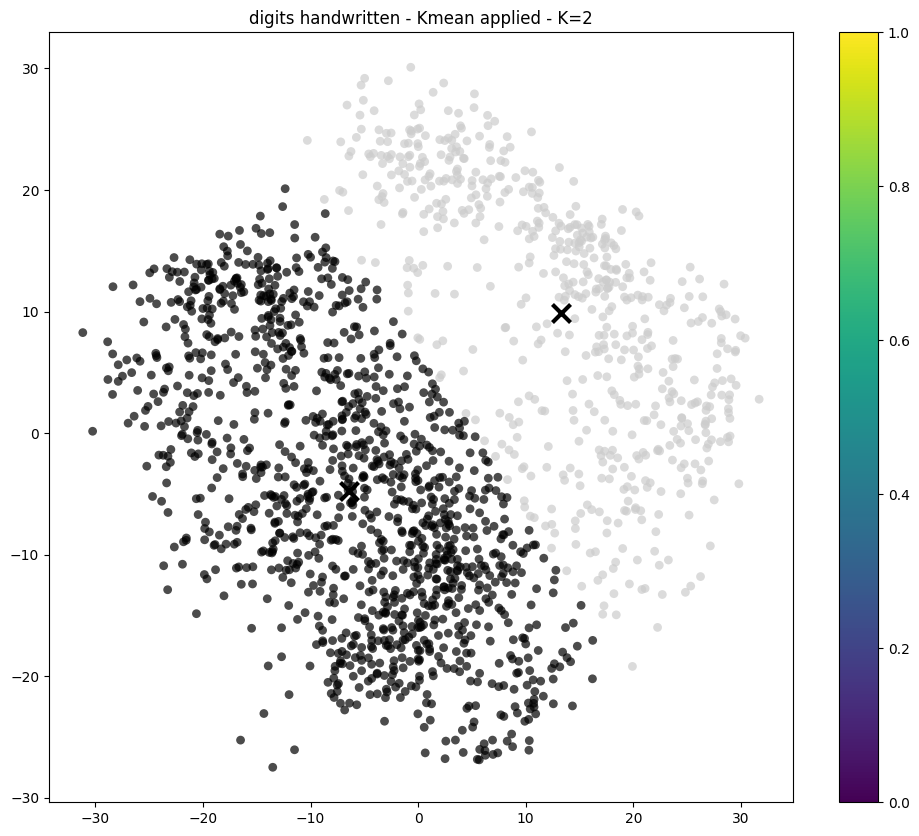

In [407]:
# Graficamos los primeros dos componentes - clusters id
plt.figure(figsize=(12,10))
#con "c" y "cmap" ESTAMOS ASIGNANDO COLORES SEGÚN VALORES EN "C" Y EL MAPA DE COLORES PROPORCIONADO EN "cmap":
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=cluster_labels, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('nipy_spectral', 2))
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            marker='x', s=169, linewidths=3, 
            color='k', zorder=10) 
plt.rcParams['axes.grid'] = False
plt.colorbar()
plt.title('digits handwritten - Kmean applied - K=2')
plt.show()

In [408]:
#Creamos una tabla de frecuencias cruzadas:
tab2 = pd.crosstab(y, cluster_labels, margins=True)
tab2.index = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'All']
tab2.columns = ['cluster ' + str(i + 0) for i in range(2)] + ['All']
tab2
print(tab2)

     cluster 0  cluster 1   All
0            4        174   178
1          168         14   182
2          177          0   177
3          182          1   183
4            5        176   181
5          159         23   182
6            1        180   181
7          174          5   179
8          165          9   174
9          173          7   180
All       1208        589  1797


Se podria decir que en este caso K-means es sensible a la varianza de las variables correlacionadas.

5. Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

Usar PCA trae consigo el uso de las principales componentes, las componentes menos explicativas suelen traer ruido asociado, también PCA ayuda a reducir la correlación entre variables. Reducir la dimensionalidad, el ruido y la correlación ayuda a K-means a ser mas estable y a aumentar el rendimiento.

K-means es sensible a outliers.

## Ejercicio 9

En este ejercicio vamos a crear un _clasificador_ de caras usando GMM

In [409]:
## importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## import olivetti faces dataset from sklearn
from sklearn.datasets import fetch_olivetti_faces

## import PCA, GMM and Scaler from sklearn
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

## import train_test_split from sklearn
from sklearn.model_selection import train_test_split

## import bic from sklearn
from sklearn.metrics import accuracy_score, f1_score

## import tsne for visualization
from sklearn.manifold import TSNE

## some utils
from tqdm.notebook import tqdm

### Paso 1: Preparación del Conjunto de Datos

1. Carga el conjunto de datos Olivetti Faces utilizando la función fetch_olivetti_faces de sklearn.

2. Imprimir la forma de las imágenes y las etiquetas objetivo.

3. Divide el conjunto de datos en un conjunto de entrenamiento y uno de prueba.


In [410]:
def plot_gallery(title, images, n_col=2, n_row=2):
    plt.figure(figsize=(2. * n_col, 2.26 * n_row))
    plt.suptitle(title, size=16)
    for i, comp in enumerate(images):
        plt.subplot(n_row, n_col, i + 1)
        vmax = max(comp.max(), -comp.min())
        plt.imshow(comp.reshape(image_shape), cmap=plt.cm.gray,
                   interpolation='nearest',
                   vmin=-vmax, vmax=vmax)
        plt.xticks(())
        plt.yticks(())
    plt.subplots_adjust(0.01, 0.05, 0.99, 0.93, 0.04, 0.)

In [411]:
# Load faces data
dataset = fetch_olivetti_faces(shuffle = True, random_state = 42)
faces = dataset.data

n_samples, n_features = faces.shape

print("Dataset consists of %d faces" % n_samples)
print("Every image contains %d features" % n_features)

Dataset consists of 400 faces
Every image contains 4096 features


In [412]:
dataset.target

array([20, 28,  3, 21,  9,  8, 32,  9, 26, 12,  0, 36,  5,  7, 13,  4, 27,
       37, 23, 38,  7,  1, 39, 27,  0, 39, 11, 22, 26, 10, 39, 19, 26,  5,
       23, 11, 11, 34, 15, 14, 38,  5,  7,  2,  8, 38, 14, 18,  2, 17,  4,
       32, 33,  7, 37,  3, 22, 17,  3, 15, 12, 29, 25,  7, 10,  3, 35, 26,
       39,  7, 32, 14,  0,  4, 38, 24, 22, 36, 17, 28,  0,  1, 20, 25, 27,
        6, 24, 30, 10,  9, 23, 33, 11, 22, 18, 31, 37, 38, 23,  7, 24, 11,
        1,  6, 15,  0,  1, 13, 35, 34, 13, 38, 29, 38, 29,  6,  7, 28, 30,
       28, 15, 10,  1, 34,  2, 17, 35, 33, 16, 24, 31, 14, 25, 17, 11, 19,
       22, 26, 21, 30,  3, 13, 29, 15, 19, 28,  5, 11, 16, 36,  0, 33, 27,
       15,  1, 19, 10,  8, 31, 39, 37, 20, 28, 16, 35,  8, 37, 16, 14, 22,
        9,  6, 12,  9, 14, 32,  9, 23,  6,  2,  3, 14, 12, 18,  6, 19, 32,
       21, 31, 19, 12, 14, 37,  8, 33, 34, 33, 35, 33, 30, 18, 20, 28, 21,
       28, 12,  3,  1, 32, 18, 22, 11, 17, 32, 29, 11, 36, 27, 38, 28, 36,
       16, 25, 13, 15, 19

In [413]:
## split dataset into train and test set
X_train, X_test, y_train, y_test = train_test_split(
    faces, dataset.target, test_size=0.2, random_state=42
)

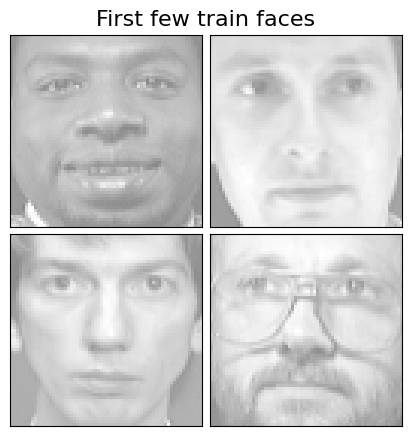

In [414]:
## plotting a few faces from train
n_col = 2
n_row = 2
image_shape = (64, 64)
plot_gallery("First few train faces", X_train[:n_col * n_row], n_col=n_col, n_row=n_row)

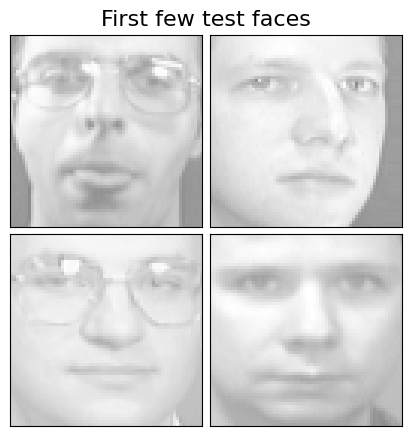

In [415]:
## plot some test faces
plot_gallery("First few test faces", X_test[:n_col * n_row], n_col=n_col, n_row=n_row)

### Paso 2: Visualización del dataset en el espacio de T-SNE

1. Ahora que importamos la libreria de T-SNE, inicializamos la clase.
2. Dado que queremos visualizar, deberiamos setear `n_components` en 2
o 3.

In [416]:
## use tsne to visualize the embeddings for train and test
tsne = ...

## fit tsne on train and test
X_train_tsne = tsne.fit_transform(X_train)
X_test_tsne = tsne.fit_transform(X_test)

AttributeError: 'ellipsis' object has no attribute 'fit_transform'

In [ ]:
## plot the embeddings
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train)
plt.title("Train")
plt.subplot(1, 2, 2)
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=y_test)
plt.title("Test")
plt.show()


### Paso 3: Entrenamos GMM para cada Persona

1. Vamos a crear una serie de modelos para cada target del modelo.
2. **NOTA:** La idea es que ustedes elijan el mejor numero de componentes
tomando por ejemplo el criterio de _BIC_

**NOTA 2:** Este paso puede representar una carga muy pesada de cálculo a su
computadora. Por ello vamos a analizar las primeras 10 caras del dataset solamente.


In [ ]:
## filtering the first n_labels labels from the dataset

n_labels = 5

X_train_red = X_train[y_train <= n_labels]
X_test_red = X_test[y_test <= n_labels]

y_train_red = y_train[y_train <= n_labels]
y_test_red = y_test[y_test <= n_labels]

Vamos a crear un diccionario de modelos de GMM para las $n_labels$ caras
a analizar. La idea es que elijan la cantidad de componentes correctas.

En este esqueleto dejamos fijas 5 componentes

In [ ]:
# Create a dictionary to store the GMM for each person
gmms = {}

for i in tqdm(range(n_labels)):
    # Get the images of the current person
    person_images = X_train_red[y_train_red == i]

    # Train a GMM on these images
    gmm = GaussianMixture(
        n_components=5, random_state=42
    )
    gmm.fit(person_images)

    # Store the GMM in the dictionary
    gmms[i] = gmm


### Paso 4: Hora de predecir!!

Vamos a generar las nuevas clasificaciones con nuestros modelos de 
GMM.


In [ ]:
from typing import Dict, Any

In [ ]:
def get_best_pred(image: pd.Series, models: Dict[int, Any]) -> Dict[str, int]:
    best_person = None
    best_score = -np.inf

    scores = [gmm.score_samples([image]) for gmm in models.values()]

    ## now that we have the scores, we should get the model that has
    ## the highest score.
    return {
        "best_person": np.argmax(scores),
        "best_score": scores[np.argmax(scores)],
    }

In [ ]:
predictions = []

for image in tqdm(X_test_red):
    preds = get_best_pred(image, gmms)

    predictions.append(preds)

### Paso 5: Validamos el resultado

En este paso, Vamos a checkear el accuracy y el f1 de nuestro predictor.

In [ ]:
## Primero armamos un crosstab a ver si el modelo funciona.
pd.crosstab(
    y_test_red,
    [pred["best_person"] for pred in predictions],
    rownames=["True"],
    colnames=["Predicted"],
)

In [ ]:
accuracy_score(y_test_red, [pred["best_person"] for pred in predictions])

In [ ]:
f1_score(y_test_red, [pred["best_person"] for pred in predictions], average="macro")

### Paso 5: Conclusión

1. ¿Qué aprendiste de la visualización con t-SNE? ¿Cómo se desempeñó el GMM?

2. Discute las posibles mejoras que podrían realizarse en este modelo de detección de rostros.

## Ejercicio 10 (OPCIONAL)

El objetivo de este ejercicio es utilizar GMM para agrupar documentos de texto
basándose en sus características. Esto nos debería dar un buen pantallazo
del uso que podemos darle a los métodos de segmentación.

> ***NOTA***: Este ejercicio no tienen que entregarlo. Se los dejo para que puedan
tenerlo de referencia!

> ***NOTA:*** Aquí vamos a utilizar HuggingFace Transformers, tengan en cuenta
    que esto va a poner una carga posiblemente MUY grande en su computadora. 
    Si su compu no tiene muchos recursos por favor, avisenme y configuramos esto
    en Google colab para poder 

In [ ]:
## importing basics libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

## import train_test_split from sklearn
from sklearn.model_selection import train_test_split

## import tsne for visualization
from sklearn.manifold import TSNE

## Import GMM and PCA from sklearn
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture


## importing transformers libraries
from transformers import pipeline
import torch

## importing spacy library and en_core_web_lg model
import spacy

## importing 20newsgroups dataset from sklearn
from sklearn.datasets import fetch_20newsgroups

## some utils
from tqdm.notebook import tqdm

In [ ]:
import sys

sys.platform

In [ ]:
## check if the OS is Mac set device to "mps" if not, validate if cuda is available an set device to GPU or CPU
if sys.platform == "darwin":
    device = "mps"
elif torch.cuda.is_available():
    device = "cuda"
else:
    device = "cpu"


In [ ]:
## initializing the pipeline called embedding using bert-model-uncased from huggingface
## including the tokenizer and the model itself. GPU is used for faster inference if available.
pipe = pipeline(
    "feature-extraction",
    model="distilbert-base-uncased",
    tokenizer="distilbert-base-uncased",
    truncation=True,
    padding=True,
    max_length=512,
    return_tensors="pt",
    device=device
)

Para inicializar el modelo de spacy, primero tenemos que descargar el modelo. Para ello corremos el siguiente comando

In [ ]:
!python -m spacy download en_core_web_sm

In [ ]:
## Initializing the spacy model. first it should be downloaded using the following command:
## python -m spacy download en_core_web_sm
nlp = spacy.load("en_core_web_sm")


### Paso 1: Preparación del Conjunto de Datos

1. Aquí, vamos a importar las bibliotecas principales que vamos a usar,
tales como NumPy, sklearn, pandas, etc.

2. Vamos a tomar el dataset 20 Newsgroups de sklearn.

3. Separación en train y test



In [ ]:
## importing the dataset and filtering only the first 5 labels
dataset = fetch_20newsgroups(
    shuffle=True,
    random_state=42,
    subset="train",
    remove=("headers", "footers", "quotes"),
    categories=[
        "comp.graphics",
        "comp.os.ms-windows.misc",
        "comp.sys.ibm.pc.hardware",
        "comp.sys.mac.hardware",
        "comp.windows.x",
    ],
)

## getting the data and perfoming some preprocessing such as removing the
## zero length strings and removing the new line characters.
data = dataset.data
data = [text.replace("\n", " ") for text in data if len(text) > 0]

## now removing the labels for the texts that were removed
labels = dataset.target[[len(text) > 0 for text in dataset.data]]

## converting all the texts to lowercase
data = [text.lower() for text in data]


## splitting the dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(
    data, labels, test_size=0.2, random_state=42
)

In [ ]:
print("Dataset consists of %d texts" % len(data))
print("Train set consists of %d texts" % len(X_train))
print("Test set consists of %d texts" % len(X_test))


In [ ]:
## print some examples
for i in range(2):
    print(f"Example {i} - Label {y_train[i]}")
    print(X_train[i][:200])
    print("=========================================")

In [ ]:
## plot the histogram of the lengths of the texts
plt.figure(figsize=(10, 5))
plt.hist([len(text) for text in X_train], bins=100)
plt.show()


In [ ]:
## plot the distributions of the labels. both in train and test on the same graph
## on the X_label it should appear the name of the label and not the number.

plt.hist(y_train, alpha = 0.5, label = "Train")
plt.hist(y_test, alpha = 0.5, label = "Test")
plt.xticks(range(len(dataset.target_names)), dataset.target_names, rotation = 90)
plt.legend()
plt.show()


### Paso 2: Extracción de Características

En este paso vamos a utilizar dos tipos de embeddings, los embeddings de
transformers y los embeddings de SpaCy.

> **NOTA** Este paso puede ser MUY pesado para su compu. Tengan en cuenta
esto antes de correr estos pasos!

> En el caso que no puedan correr estas lineas, pueden ignorar este paso
y utilizar directamente los archivos que están provistos en la carpeta
`./data/embeddings/`

In [ ]:
train_embeddings = pipe(X_train)
test_embeddings = pipe(X_test)

In [ ]:
# now from embs we should get every embedding and get the mean of the embeddings
# for each text. this should be done for both train and test sets.
X_train_embs = np.array(
    [emb.mean(axis=1).detach().numpy().squeeze() for emb in tqdm(train_embeddings)]
)
X_test_embs = np.array(
    [emb.mean(axis=1).detach().numpy().squeeze() for emb in tqdm(test_embeddings)]
)

In [ ]:
## Es una buena recomendación guardar los embeddings en estos momentos. Así nos evitamos volver a calcularlos
## Guardamos entonces los embeddings en un archivo .parquet usando pandas.
## en el archivo de pandas vamos a guardar tanto los embeddings como las etiquetas de cada texto.
## las columnas de features deben llamarse "emb_0", "emb_1", etc.
## para guardar los embeddings en un archivo parquet, primero debemos convertirlos a un dataframe de pandas
## y luego usar el método to_parquet de pandas.

X_train_df = pd.DataFrame(X_train_embs, columns = [f"emb_{i}" for i in range(X_train_embs.shape[1])])
y_train_df = pd.DataFrame(y_train, columns = ["target"])
X_test_df = pd.DataFrame(X_test_embs, columns = [f"emb_{i}" for i in range(X_test_embs.shape[1])])
y_test_df = pd.DataFrame(y_test, columns = ["target"])

pd.concat([X_train_df, y_train_df], axis = 1).to_parquet("./data/embeddings/train_tf.parquet")
pd.concat([X_test_df, y_test_df], axis = 1).to_parquet("./data/embeddings/test_tf.parquet")

Ahora que generamos los embeddings con Tranformers, hacemos lo mismo pero con SpaCy

In [ ]:
# Para cada documento, utiliza Spacy para obtener el vector del documento
X_train_spacy = np.array([nlp(doc).vector for doc in tqdm(X_train)])
X_test_spacy = np.array([nlp(doc).vector for doc in tqdm(X_test)])

In [ ]:
X_train_df = pd.DataFrame(X_train_spacy, columns = [f"emb_{i}" for i in range(X_train_spacy.shape[1])])
y_train_df = pd.DataFrame(y_train, columns = ["target"])
X_test_df = pd.DataFrame(X_test_spacy, columns = [f"emb_{i}" for i in range(X_test_spacy.shape[1])])
y_test_df = pd.DataFrame(y_test, columns = ["target"])

pd.concat([X_train_df, y_train_df], axis = 1).to_parquet("./data/embeddings/train_sp.parquet")
pd.concat([X_test_df, y_test_df], axis = 1).to_parquet("./data/embeddings/test_sp.parquet")

### Paso 3: Aplicación de GMM

1. Aplica el GMM a las características de obtenidas (Tanto en transformers como en SpaCy). Experimenta con diferentes números de componentes.

2. Utiliza el GMM para predecir una etiqueta de cluster para cada documento.

Primero antes de arrancar es un buen momento de visualizar nuestros embeddings. Para ello,
primero vamos a cargar los embeddings.

recordemos que los embeddings con sufijo `_tf` corresponden al modelo de Transformers y
`_sp` corresponden al modelo de SpaCy.

In [ ]:
df_train = pd.read_parquet("./data/embeddings/train_tf.parquet")
df_test = pd.read_parquet("./data/embeddings/test_tf.parquet")

In [ ]:
df_train.shape

In [ ]:
## create a visualization of the embeddings using tsne.
## use the target to color the points.
## use the following colors: ["red", "blue", "green", "yellow", "orange"]

tsne = TSNE()
X_tsne = tsne.fit_transform(df_train.drop("target", axis = 1))

plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c = df_train["target"], cmap = "rainbow")
plt.show()

Ahora si! vamos con GMM. Para ello primero vamos a utilizar PCA para poder
comprimir la informacion de los embeddings en algo más maleable.

Ahora evaluemos, como le fue al clusterizador?

In [ ]:
## Creamos una tabla de frecuencias cruzadas entre las etiquetas y los clusters.
pd.crosstab(df_pca_train['target'], df_pca_train['cluster'])

### Paso 4: Evaluación de los Resultados

1. Examinar algunos documentos de cada cluster. Tienen sentido los resultados?

2. Experimenta con diferentes números de clusters. Podemos encontrar algo interesante variando el parámetro
de `n_components`?

3. ¿Qué sucede si cambias el tipo de covarianza en el GMM? ¿Cómo afecta esto a los resultados?

4. Si hubiesemos usado kMeans como alternativa para clusterizar, hubiesemos tenido mejor resultado?

5. Entre el embedding de SpaCy y el embedding de Transformers, encontró alguna diferencia respecto
a la clusterización?